# Analysis of teams

This notebook contains analyses of teams that participated at the **`Copa America 2021`**. The analyses included are: `Goal contribution`, `Goal scoring`, `Progressive actions`, `Defensive actions`, and others. Inspiration is primarly taken from [@TalkingUnited](https://twitter.com/TalkingUnited).

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
import seaborn as sns

from highlight_text import htext
from matplotlib.offsetbox import OffsetImage,AnchoredOffsetbox
from mplsoccer import Pitch, VerticalPitch
from PIL import Image

In [2]:
pd.set_option('display.max_columns', 100)

## Set constants

In [3]:
countries = ['argentina', 'bolivia', 'brazil', 'colombia', 'chile', 'ecuador', 'paraguay', 'peru', 
             'uruguay', 'venezuela']

## 1. Goal contribution

This analysis is inspired in [@TaIkingUnited](https://twitter.com/TaIkingUnited) who published the analysis [here](https://twitter.com/TaIkingUnited/status/1470815092170231809). It involves data about `npxG` and `xA`.

### Load data

In [4]:
analysis_df = pd.DataFrame()
for country in countries:
    if analysis_df.size > 0:
        aux_analysis_df = pd.read_csv(f"data/{country}_standard.csv")
        aux_analysis_df['country'] = country
        analysis_df = analysis_df.append(aux_analysis_df, ignore_index=True, sort=False)
    else:
        analysis_df = pd.read_csv(f"data/{country}_standard.csv")
        analysis_df['country'] = country        

### Check data

In [5]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 292 rows and 30 columns


In [6]:
analysis_df.head()

,player,pos,age,playingtime_mp,playingtime_starts,playingtime_min,playingtime_90s,performance_gls,performance_ast,performance_g-pk,performance_pk,performance_pkatt,performance_crdy,performance_crdr,per90minutes_gls,per90minutes_ast,per90minutes_g+a,per90minutes_g-pk,per90minutes_g+a-pk,expected_xg,expected_npxg,expected_xa,expected_npxg+xa,per90minutes_xg,per90minutes_xa,per90minutes_xg+xa,per90minutes_npxg,per90minutes_npxg+xa,matches,country
0,Lionel Messi,"FW,MF",33.0,7,7,660.0,7.3,4.0,5.0,3.0,1.0,1.0,0.0,0.0,0.55,0.68,1.23,0.41,1.09,2.8,2.0,2.9,4.9,0.38,0.40,0.78,0.27,0.67,Matches,argentina
1,Emiliano Martínez,GK,28.0,6,6,570.0,6.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,argentina
2,Rodrigo De Paul,MF,26.0,6,5,498.0,5.5,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.18,0.18,0.36,0.18,0.36,1.0,1.0,0.8,1.8,0.17,0.15,0.32,0.17,0.32,Matches,argentina
3,Nicolás Otamendi,DF,32.0,5,5,480.0,5.3,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,argentina
4,Lautaro Martínez,FW,23.0,6,5,445.0,4.9,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.61,0.00,0.61,0.61,0.61,4.5,4.5,0.0,4.6,0.92,0.01,0.92,0.92,0.92,Matches,argentina


### Filter data

**Remove goalkeepers**

In [7]:
analysis_df = analysis_df[analysis_df['pos'] != 'GK']

In [8]:
print(f"After removing GKs the dataset contains {analysis_df.shape[0]} players")

After removing GKs the dataset contains 261 players


**Remove players who play less than 50% of the team's played minutes**

In [9]:
min_teams_played = analysis_df.loc[analysis_df['player']=='Squad Total', ['country', 'playingtime_90s']]

In [10]:
analysis_fdf = pd.DataFrame()
for country in countries:
    team = analysis_df[analysis_df['country']==country]
    min_team_played = min_teams_played.loc[min_teams_played['country']==country, 'playingtime_90s'].values[0]
    if analysis_fdf.size > 0:
        analysis_fdf = analysis_fdf.append(team[team['playingtime_90s'] >= (min_team_played/2)], ignore_index=True, 
                                           sort=False)
    else:
        analysis_fdf = team[team['playingtime_90s'] >= (min_team_played/2)]

**Remove summary rows**

In [11]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Squad Total']

In [12]:
analysis_fdf = analysis_fdf[analysis_fdf['player']!='Opponent Total']

**Select columns**

In [13]:
analysis_fdf = analysis_fdf[['player','pos', 'country', 'per90minutes_xa', 'per90minutes_npxg']]

In [14]:
analysis_fdf.head()

,player,pos,country,per90minutes_xa,per90minutes_npxg
0,Lionel Messi,"FW,MF",argentina,0.40,0.27
1,Rodrigo De Paul,MF,argentina,0.15,0.17
2,Nicolás Otamendi,DF,argentina,0.00,0.00
3,Lautaro Martínez,FW,argentina,0.01,0.92
4,Giovani Lo Celso,MF,argentina,0.29,0.01


In [15]:
analysis_fdf.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  13,  14,
             15,  16,  17,  18,  19,  20,  23,  24,  25,  26,  27,  28,  29,
             30,  31,  34,  35,  36,  37,  38,  39,  40,  41,  42,  45,  46,
             47,  48,  49,  50,  51,  52,  53,  54,  57,  58,  59,  60,  61,
             62,  63,  64,  65,  66,  69,  70,  71,  72,  73,  74,  75,  76,
             77,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  92,  93,
             94,  95,  96,  97,  98,  99, 100, 101, 102, 105, 106, 107, 108,
            109, 110, 111, 112, 113],
           dtype='int64')

In [30]:
analysis_fdf[analysis_fdf['country']=='venezuela']

,player,pos,country,per90minutes_xa,per90minutes_npxg
105,Luis Mago,DF,venezuela,0.01,0.04
106,Junior Moreno,MF,venezuela,0.00,0.00
107,Cristian Cásseres Jr.,"FW,MF",venezuela,0.06,0.07
108,Alexander González,DF,venezuela,0.02,0.01
109,José Andrés Martínez,"FW,MF",venezuela,0.21,0.00
110,Adrián Martínez,DF,venezuela,0.00,0.10
111,Yohan Cumana,DF,venezuela,0.00,0.01
112,Fernando Aristeguieta,FW,venezuela,0.01,0.02
113,Francisco La Mantía,DF,venezuela,0.00,0.00


### Draw scatterplots

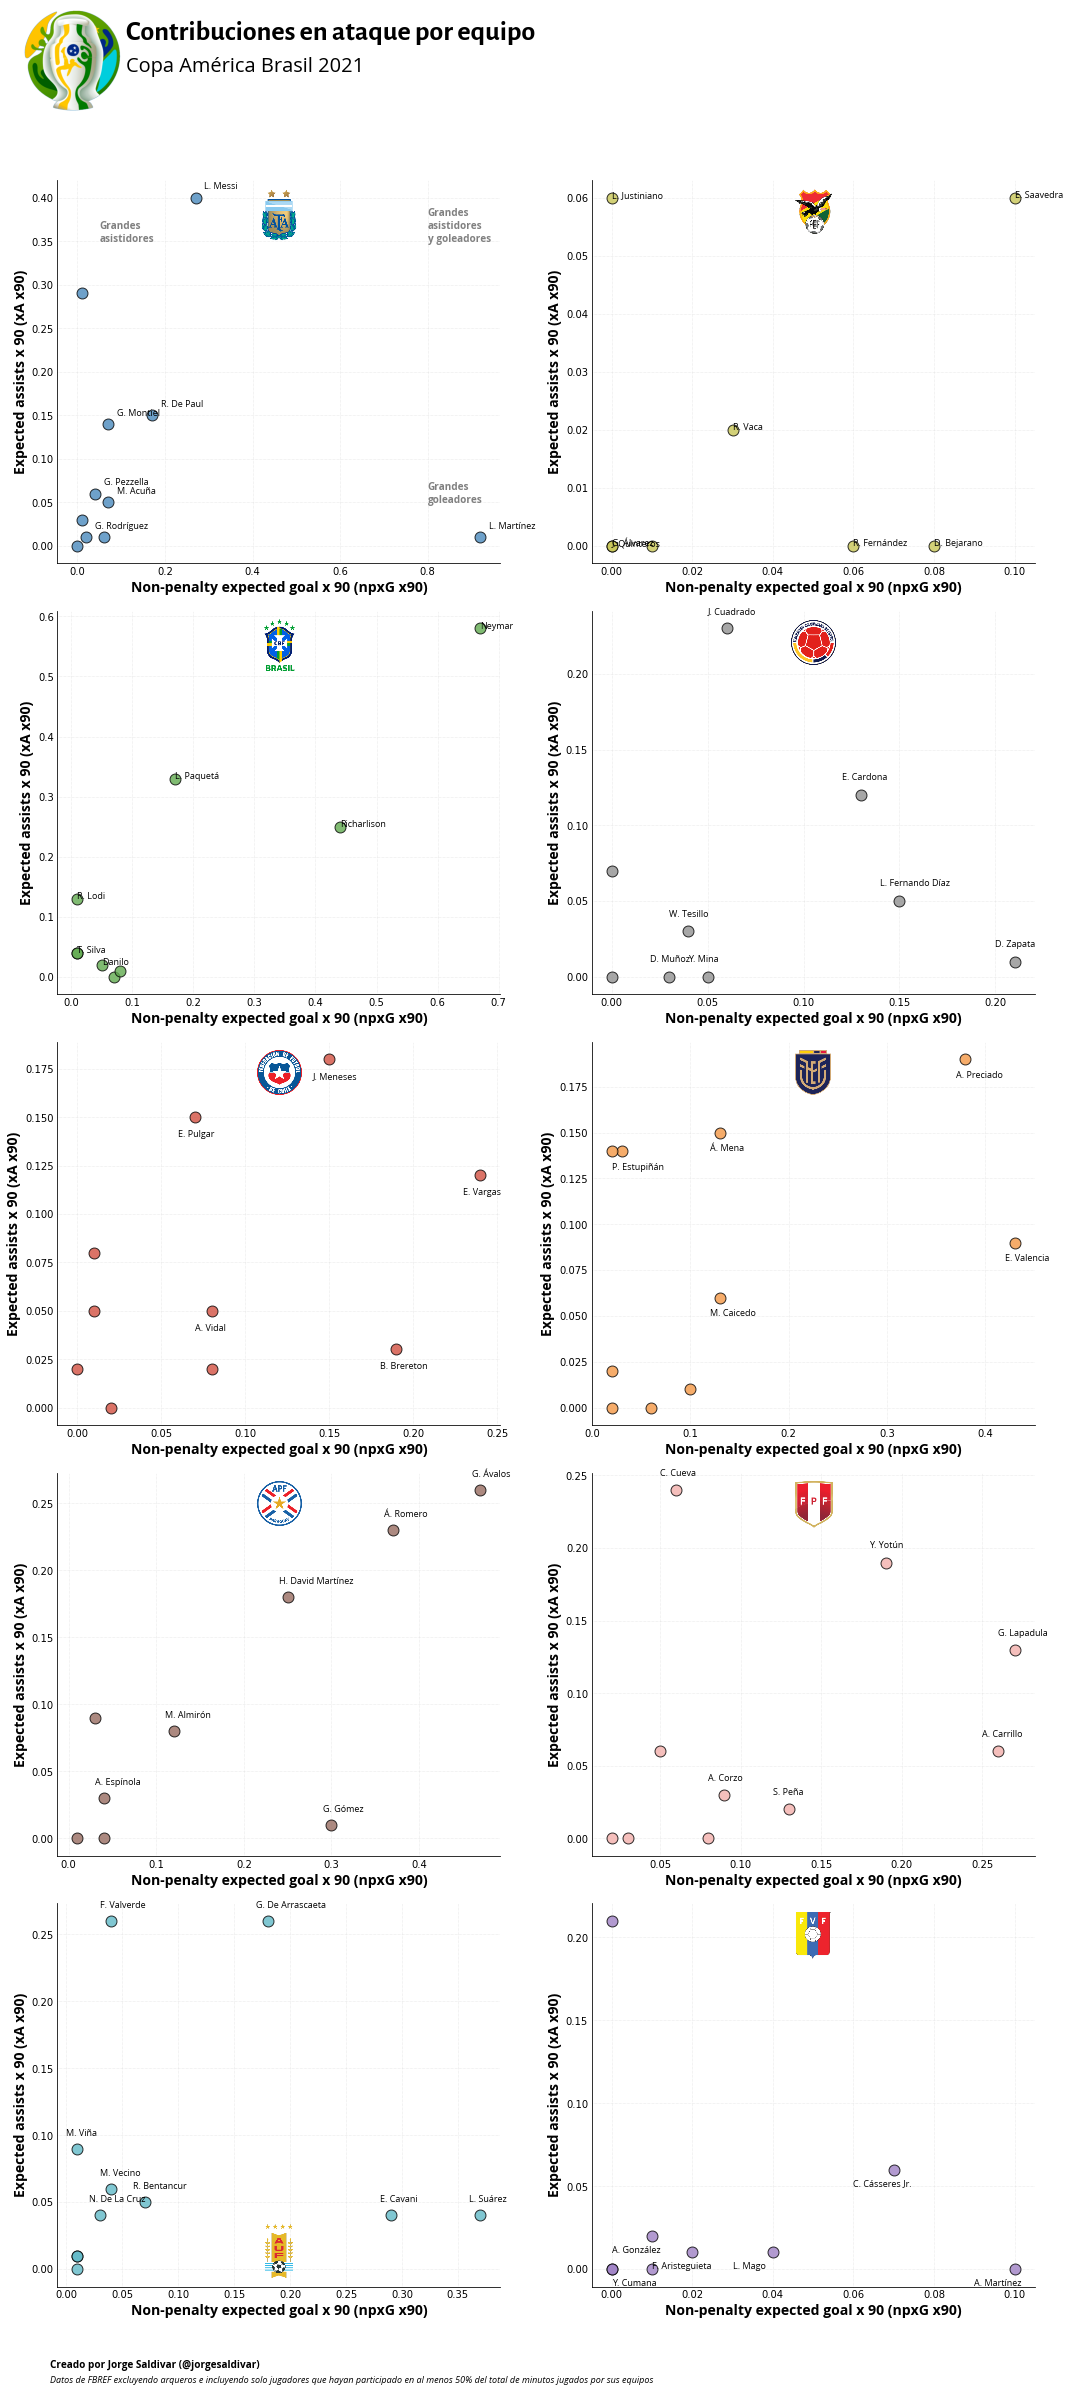

In [53]:
title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15,30))
fig.set_facecolor(background)

colors = {'argentina':'#4A8ABD', 'bolivia':'#C8C656', 'brazil':'#61AA4F', 'colombia':'#919191' , 
          'chile':'#D25041', 'ecuador': '#F49845', 'paraguay': '#976C60', 'peru': '#F3B0AB', 'uruguay': '#60B9C7',
          'venezuela': '#9F81C5'}

idx = 0    
for i in range(0,5):
    for j in range(0,2):
        # set figure's params
        axs[i][j].patch.set_alpha(0)
        axs[i][j].grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)
        axs[i][j].tick_params(axis="both",length=0)
        spines = ["top","right", "bottom", "left"]
        for s in spines:
            if s in ["top","right"]:
                axs[i][j].spines[s].set_visible(False)
            else:
                axs[i][j].spines[s].set_color(text_color)
        team = analysis_fdf[analysis_fdf['country']==countries[idx]]
        x = team['per90minutes_npxg'].values
        y = team['per90minutes_xa'].values
        axs[i][j].scatter(x, y, s=120, color=colors[countries[idx]], alpha=0.8, lw=1, zorder=2, edgecolor='black')
        # add players' names
        x_25 = team['per90minutes_npxg'].describe()['25%']
        y_25 = team['per90minutes_xa'].describe()['25%']
        for k, player_name in enumerate(team['player']):
            if y[k] < y_25 or x[k] < x_25:
                    continue
            if countries[idx] == 'argentina':
                if 'Tagliafico' in player_name:
                    continue
                else:
                    delta_x = 0.02
                    delta_y = 0.01
            elif countries[idx] == 'bolivia':
                if 'Jusino' in player_name:
                    continue
                else:
                    delta_x = 0
                    delta_y = 0
            elif countries[idx] == 'brazil':
                if 'Fred' in player_name:
                    continue
            elif countries[idx] in ['ecuador', 'chile']:
                delta_y = -0.01
            elif countries[idx] == 'venezuela':
                delta_y = -0.01
            else:
                delta_x = -0.01
                delta_y = 0.01
            f_player_name = player_name
            if ' ' in f_player_name:
                f_player_name = f"{f_player_name[0]}. {' '.join(f_player_name.split(' ')[1:])}"
            axs[i][j].annotate(f_player_name, (x[k]+delta_x, y[k]+delta_y), fontfamily=body_font, 
                               fontweight="regular", fontsize=9, color=text_color, zorder=3)
        # add axis labels
        axs[i][j].set_xlabel(f"Non-penalty expected goal x 90 (npxG x90)", fontfamily=body_font, fontweight="bold", 
                             fontsize=14, color=text_color)
        axs[i][j].set_ylabel(f"Expected assists x 90 (xA x90)", fontfamily=body_font, fontweight="bold", fontsize=14, 
                             color=text_color)
        # add logo
        if countries[idx] == 'uruguay':
            loc='lower center'
        else:
            loc='upper center'
        img = Image.open(f"imgs/logos/{countries[idx]}.png")
        imagebox = OffsetImage(img, zoom=0.3)
        ab = AnchoredOffsetbox(loc=loc, child=imagebox, frameon=False)
        axs[i][j].add_artist(ab)
        
        # add inner labels but only for the first chart
        if (i+j) == 0:
            axs[i][j].annotate('Grandes\nasistidores',(0.05, 0.35), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Grandes\nasistidores\ny goleadores', (0.8, 0.35), fontfamily=body_font, 
                               fontweight="bold", fontsize=10, color='gray', zorder=3)
            axs[i][j].annotate('Grandes\ngoleadores', (0.8, 0.05), fontfamily=body_font, fontweight="bold", 
                               fontsize=10, color='gray', zorder=3)
        
        # add horizontal lines
        #axs[i][j].axhline(y=team['per90minutes_xa'].describe()['25%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axhline(y=analysis_fdf['per90minutes_xa'].describe()['50%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axhline(y=team['per90minutes_xa'].describe()['75%'], color='gray', linestyle='dotted', lw=1)
        # add vertical lines
        #axs[i][j].axvline(x=team['per90minutes_npxg'].describe()['25%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axvline(x=analysis_fdf['per90minutes_npxg'].describe()['50%'], color='gray', linestyle='dotted', lw=1)
        #axs[i][j].axvline(x=team['per90minutes_npxg'].describe()['75%'], color='gray', linestyle='dotted', lw=1)
        idx += 1

## add title
fig.text(0.12,1.06,"Contribuciones en ataque por equipo",fontweight="bold", fontsize=28,fontfamily=title_font, color=text_color)
fig.text(0.12,1.045,"Copa América Brasil 2021",fontweight="regular", fontsize=20,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,1,0.10,0.10]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)

## add footer
s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.018, s, fontweight="bold", fontsize=10, fontfamily=body_font, color=text_color)
s = "Datos de FBREF excluyendo arqueros e incluyendo solo jugadores que hayan participado en al menos 50% del total de minutos jugados por sus equipos"
fig.text(0.05, -0.025, s, fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)

plt.savefig("outputs/goal_contribution.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()

## 2. Goal contribution

## 5. Pressing zones

This analysis is inspired in [@StatsBomb](https://twitter.com/StatsBomb) who published the analysis [here](https://twitter.com/StatsBomb/status/1214629788314419200). It involves data about pressures.

### Load data

In [4]:
analysis_df = pd.DataFrame()
for country in countries:
    if analysis_df.size > 0:
        aux_analysis_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        aux_analysis_df['country'] = country
        analysis_df = analysis_df.append(aux_analysis_df, ignore_index=True, sort=False)
    else:
        analysis_df = pd.read_csv(f"data/{country}_defensive_actions.csv")
        analysis_df['country'] = country        

### Check data

In [5]:
print(f"The dataset contains {analysis_df.shape[0]} rows and {analysis_df.shape[1]} columns")

The dataset contains 253 rows and 29 columns


In [6]:
analysis_df.tail()

,player,pos,age,90s,tackles_tkl,tackles_tklw,tackles_def 3rd,tackles_mid 3rd,tackles_att 3rd,vsdribbles_tkl,vsdribbles_att,vsdribbles_tkl%,vsdribbles_past,pressures_press,pressures_succ,pressures_%,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,blocks_blocks,blocks_sh,blocks_shsv,blocks_pass,int,tkl+int,clr,err,matches,country
248,Jan Carlos Hurtado,FW,20.0,0.3,0,0,0,0,0,0,0,NaN,0,15,3,20.0,0,10,5,0,0,0,0,0,0,1,0,Matches,venezuela
249,Richard Celis,MF,24.0,0.3,4,2,2,2,0,2,3,66.7,1,13,3,23.1,5,6,2,2,0,0,2,2,6,1,0,Matches,venezuela
250,Yeferson Soteldo,"FW,MF",23.0,0.2,0,0,0,0,0,0,0,NaN,0,7,1,14.3,1,3,3,0,0,0,0,0,0,0,0,Matches,venezuela
251,Squad Total,NaN,26.0,4.0,75,53,41,26,8,39,87,44.8,48,710,182,25.6,327,280,103,67,19,1,48,68,143,104,2,NaN,venezuela
252,Opponent Total,NaN,27.3,4.0,77,43,28,32,17,30,71,42.3,41,704,233,33.1,185,317,202,52,10,0,42,50,127,78,0,NaN,venezuela


### Filter data

In [28]:
pressing_zones_by_team = analysis_df.loc[analysis_df['player']=='Squad Total', ['country','pressures_def 3rd', 
                                                                                'pressures_mid 3rd',
                                                                                'pressures_att 3rd']]

### Add a total row

In [29]:
total_row = pd.Series({'country':'total','pressures_def 3rd': pressing_zones_by_team['pressures_def 3rd'].sum(),
                       'pressures_mid 3rd': pressing_zones_by_team['pressures_mid 3rd'].sum(),
                       'pressures_att 3rd': pressing_zones_by_team['pressures_att 3rd'].sum()})
pressing_zones_by_team = pressing_zones_by_team.append(total_row, ignore_index=True)

### Add average row

In [30]:
avg_row = pd.Series({'country':'avg','pressures_def 3rd': pressing_zones_by_team['pressures_def 3rd'].mean(),
                     'pressures_mid 3rd': pressing_zones_by_team['pressures_mid 3rd'].mean(),
                     'pressures_att 3rd': pressing_zones_by_team['pressures_att 3rd'].mean()})
pressing_zones_by_team = pressing_zones_by_team.append(avg_row, ignore_index=True)

### Add total columns

In [41]:
pressing_zones_by_team['per_pressures_def 3rd'] = round(pressing_zones_by_team['pressures_def 3rd'] / (pressing_zones_by_team['pressures_def 3rd']+pressing_zones_by_team['pressures_mid 3rd']+pressing_zones_by_team['pressures_att 3rd']),3)
pressing_zones_by_team['per_pressures_mid 3rd'] = round(pressing_zones_by_team['pressures_mid 3rd'] / (pressing_zones_by_team['pressures_def 3rd']+pressing_zones_by_team['pressures_mid 3rd']+pressing_zones_by_team['pressures_att 3rd']),3)
pressing_zones_by_team['per_pressures_att 3rd'] = round(pressing_zones_by_team['pressures_att 3rd'] / (pressing_zones_by_team['pressures_def 3rd']+pressing_zones_by_team['pressures_mid 3rd']+pressing_zones_by_team['pressures_att 3rd']),3)

### Check computed data

In [42]:
pressing_zones_by_team

,country,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,per_pressures_def 3rd,per_pressures_mid 3rd,per_pressures_att 3rd
0,argentina,322.000000,420.000000,247.000000,0.326,0.425,0.250
1,bolivia,310.000000,279.000000,186.000000,0.400,0.360,0.240
2,brazil,313.000000,424.000000,250.000000,0.317,0.430,0.253
3,colombia,499.000000,564.000000,311.000000,0.363,0.410,0.226
4,chile,332.000000,311.000000,156.000000,0.416,0.389,0.195
5,ecuador,231.000000,388.000000,226.000000,0.273,0.459,0.267
6,paraguay,328.000000,413.000000,167.000000,0.361,0.455,0.184
7,peru,466.000000,591.000000,233.000000,0.361,0.458,0.181
8,uruguay,284.000000,376.000000,179.000000,0.338,0.448,0.213
9,venezuela,327.000000,280.000000,103.000000,0.461,0.394,0.145


### Sort data so teams that press higher are last

In [65]:
pressing_zones_by_team.sort_values(['per_pressures_att 3rd', 'per_pressures_def 3rd'], ascending=[True, False], inplace=True)

In [66]:
pressing_zones_by_team

,country,pressures_def 3rd,pressures_mid 3rd,pressures_att 3rd,per_pressures_def 3rd,per_pressures_mid 3rd,per_pressures_att 3rd
9,venezuela,327.000000,280.000000,103.000000,0.461,0.394,0.145
7,peru,466.000000,591.000000,233.000000,0.361,0.458,0.181
6,paraguay,328.000000,413.000000,167.000000,0.361,0.455,0.184
4,chile,332.000000,311.000000,156.000000,0.416,0.389,0.195
8,uruguay,284.000000,376.000000,179.000000,0.338,0.448,0.213
10,total,3412.000000,4046.000000,2058.000000,0.359,0.425,0.216
11,avg,620.363636,735.636364,374.181818,0.359,0.425,0.216
3,colombia,499.000000,564.000000,311.000000,0.363,0.410,0.226
1,bolivia,310.000000,279.000000,186.000000,0.400,0.360,0.240
0,argentina,322.000000,420.000000,247.000000,0.326,0.425,0.250


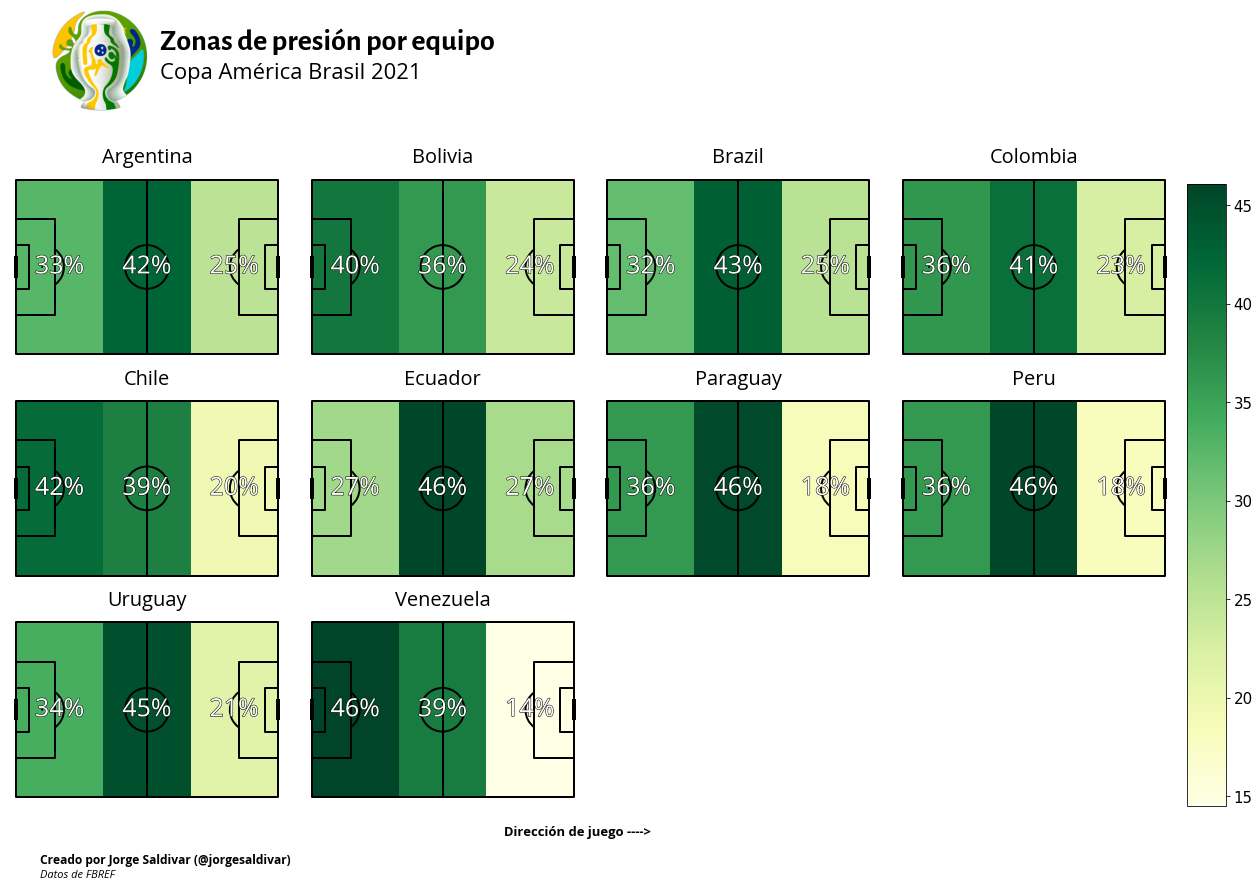

In [207]:
pressure_cols = ['per_pressures_def 3rd', 'per_pressures_mid 3rd', 'per_pressures_att 3rd']

title_font = "Alegreya Sans"
body_font = "Open Sans"
text_color = "black"
background = "white"
filler = "grey"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10

path_eff = [path_effects.Stroke(linewidth=1, foreground='black'),
            path_effects.Normal()]

# setup a mplsoccer pitch
pitch = Pitch(line_zorder=2, line_color='black', pad_top=10)

# mplsoccer calculates the binned statistics usually from raw locations, such as pressure events
# for this example we will create a binned statistic dividing
# the pitch into thirds for one point (0, 0)
# we will fill this in a loop later with each team's statistics from the dataframe
bin_statistic = pitch.bin_statistic([0], [0], statistic='count', bins=(3, 1))

GRID_HEIGHT = 0.9
CBAR_WIDTH = 0.03
fig, axs = pitch.grid(nrows=3, ncols=4, figheight=(10),
                      # leaves some space on the right hand side for the colorbar
                      grid_width=0.88, left=0.025,
                      endnote_height=0.03, endnote_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      title_space=0.01, title_height=0.04, grid_height=GRID_HEIGHT)
fig.set_facecolor('white')

teams = countries
vmin = pressing_zones_by_team[pressure_cols].min().min() * 100 # normalise the heatmaps with the min / max values
vmax = pressing_zones_by_team[pressure_cols].max().max() * 100

for i, ax in enumerate(axs['pitch'].flat[:len(teams)]):
    # the top of the StatsBomb pitch is zero
    # plot the title half way between zero and -20 (the top padding)
    ax.text(60, -10, teams[i].title(), ha='center', va='center', fontsize=20, font=body_font)

    # fill in the bin statistics from df and plot the heatmap
    bin_statistic['statistic'] = pressing_zones_by_team.loc[pressing_zones_by_team.country == teams[i], 
                                                            pressure_cols].values * 100
    heatmap = pitch.heatmap(bin_statistic, ax=ax, cmap='YlGn', vmin=vmin, vmax=vmax)
    annotate = pitch.label_heatmap(bin_statistic, color='white', fontsize=25, ax=ax,
                                   str_format='{0:.0f}%', ha='center', va='center', 
                                   font=body_font, path_effects=path_eff)

# Remove the two spare pitches
if len(teams) == 10:
    for ax in axs['pitch'][-1, 2:]:
        ax.remove()
    
# add cbar axes
cbar_bottom = axs['pitch'][-1, 0].get_position().y0
cbar_left = axs['pitch'][0, -1].get_position().x1 + 0.01
ax_cbar = fig.add_axes((cbar_left, cbar_bottom, CBAR_WIDTH,
                        # take a little bit off the height because of padding
                        GRID_HEIGHT - 0.036))
cbar = plt.colorbar(heatmap, cax=ax_cbar)
for label in cbar.ax.get_yticklabels():
    #label.set_fontproperties(fm.prop)
    label.set_fontsize(15)

## add title
fig.text(0.14,1.09,"Zonas de presión por equipo",fontweight="bold", fontsize=30,fontfamily=title_font, color=text_color)
fig.text(0.14,1.05,"Copa América Brasil 2021",fontweight="regular", fontsize=22,fontfamily=body_font, color=text_color)

## add logo
ax2 = fig.add_axes([0.02,1,0.15,0.15]) # badge
ax2.axis("off")
img = Image.open("imgs/Brasil2021ca.png")
ax2.imshow(img)
    
## add footer
s = "Dirección de juego ---->"
fig.text(0.4, -0.0005, s, fontweight="bold", fontsize=13, fontfamily=body_font, color=text_color)

s = "Creado por Jorge Saldivar (@jorgesaldivar)"
fig.text(0.05, -0.04, s, fontweight="bold", fontsize=12, fontfamily=body_font, color=text_color)
s = "Datos de FBREF"
fig.text(0.05, -0.06, s, fontstyle="italic",fontsize=11, fontfamily=body_font, color=text_color)

plt.savefig("outputs/pressing_zones.png", bbox_inches="tight", dpi=300)

plt.tight_layout()
plt.show()